<a href="https://colab.research.google.com/github/darshanjoshi16/MachineLearningPracticals/blob/main/Practical%205(ANN)/ML_Assignment_5_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Assignment 5:**

1) Implement the following activation functions for ANN using your choice of data/dataset. 
(You can use this Reference: https://realpython.com/python-ai-neural-network/)
1. Sigmoid
2. Relu
3. Tanh

2). Explore Playground.Tensorflow.org


3). Implement an ANN using Tensorflow in Python using your choice of data/dataset and activation function.

 **1) Implement the following activation functions for ANN using your choice of data/dataset**

Sigmoid

Relu

Tanh

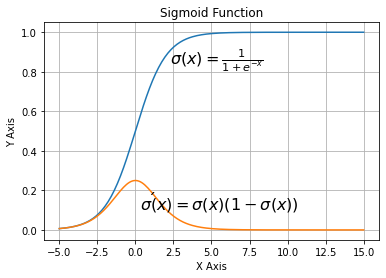

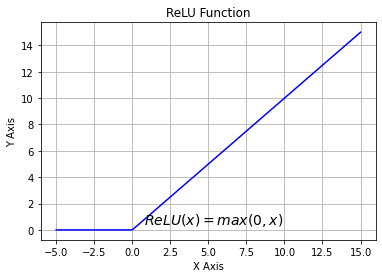

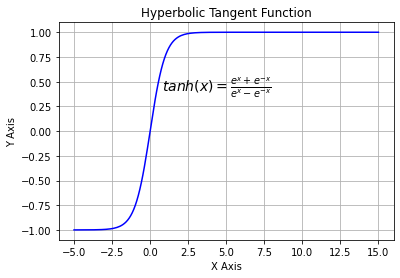

In [ ]:
# implementing the sigmoid,ReLU and Hyperbolic Tangent function with showing the matplot library graphs in it.

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0.0, x)

def htan(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

X = np.linspace(-5, 15, 200)

plt.plot(X, sigmoid(X))
plt.plot(X, sigmoid(X) * (1 - sigmoid(X)))

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)
plt.show()

X = np.linspace(-5, 15, 200)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()

X = np.linspace(-5, 15, 200)
plt.plot(X,htan(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Hyperbolic Tangent Function')
plt.grid()
plt.text(0.8, 0.4, r'$tanh(x)=\frac{e^{x}+e^{-x}}{e^{x}-e^{-x}}$', fontsize=14)
plt.show()

**3). Implement an ANN using Tensorflow in Python using your choice of data/dataset and activation function.**

In [12]:
#importing the libraries required
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#importing the dataset of churning analysis
df = pd.read_csv("https://raw.githubusercontent.com/darshanjoshi16/MachineLearningPracticals/main/Practical%205%20(ANN)/Dataset.csv")

#Generating Matrix of Features (X)
X = df.iloc[:,3:-1].values

#Generating Dependent Variable Vector(Y)
Y = df.iloc[:,-1].values

#Encoding the categorical variable
LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

#Splitting dataset into training and testing dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

#Performing Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Initialising ANN
ann = tf.keras.models.Sequential()

#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

#Fitting ANN
ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 0.9506 - accuracy: 0.2361
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8846 - accuracy: 0.2576
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8351 - accuracy: 0.2934
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7970 - accuracy: 0.3363
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7674 - accuracy: 0.3846
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7440 - accuracy: 0.4329
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7245 - accuracy: 0.4919
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.5599
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5921
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.6261
Epoch 11/

In [14]:
#Predicting result for Single Observation
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1,50000]])) > 0.5)

#Saving created neural network
ann.save("ANN.h5")

[[False]]
